In [1]:
import numpy as np
import pandas as pd

import scanpy as sc
from anticor_features.anticor_features import get_anti_cor_genes

import matplotlib.pyplot as plt

/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-03-11 12:05:14,004	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


In [2]:
adata = sc.datasets.pbmc3k()
sc.pp.calculate_qc_metrics(adata, inplace=True)

/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [3]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.normalize_total(adata) # doing the PFlog1pPF strategy

# highly variable genes as informative genes

In [7]:
hvg = adata.copy()
sc.pp.highly_variable_genes(hvg, min_mean=0.0125, max_mean=3, min_disp=0.5)

/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


In [9]:
hvg.raw = hvg
hvg = hvg[:, hvg.var["highly_variable"]]

In [11]:
sc.tl.pca(hvg, n_comps=200)

/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


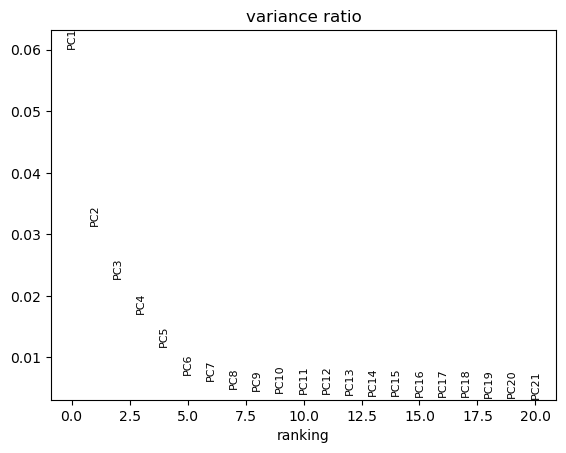

In [13]:
sc.pl.pca_variance_ratio(hvg, n_pcs=20)

In [14]:
sc.pp.neighbors(hvg, n_pcs=8, metric="cosine")

In [23]:
sc.tl.umap(hvg, random_state=42)

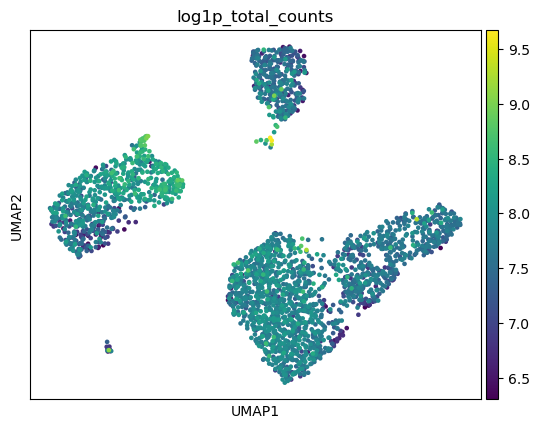

In [24]:
sc.pl.umap(hvg, color="log1p_total_counts")

# anticorrelated genes as informative genes

In [25]:
acg = adata.copy()

In [27]:
anti_cor_table = get_anti_cor_genes(acg.X.T,
                                    acg.var.index.tolist(),
                                    species="hsapiens")

found 776.013242368 free Gb in /var/folders/md/d6lwwbv97xb6g6ddypntnprh0000gp/T
get_all_remove_genes
2700 135
min_express_n 50
get_n_expressed
pathways_to_genes
    0              1    2                3      4  \
0  g#  initial alias   c#  converted alias   name   
1   1     GO:0044429  1.1  ENSG00000014919  COX15   
2   1     GO:0044429  1.2  ENSG00000198947    DMD   
3   1     GO:0044429  1.3  ENSG00000204308   RNF5   
4   1     GO:0044429  1.4  ENSG00000126581  BECN1   

                                                   5           6  
0                                        description  namespaces  
1  COX15, cytochrome c oxidase assembly homolog [...        None  
2      dystrophin [Source:HGNC Symbol;Acc:HGNC:2928]        None  
3  ring finger protein 5 [Source:HGNC Symbol;Acc:...        None  
4        beclin 1 [Source:HGNC Symbol;Acc:HGNC:1034]        None  
get_ensg_of_ref
    0              1    2                3           4  \
0  g#  initial alias   c#  converted alias  

/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


empirically determined Cneg cutoff: -0.05126447933931458  for FPR of: 0.001
empirically determined Cpos cutoff: 0.08204387680808238  for FPR of: 0.001
get_real_spear
[0, 5000, 5214]
working on 0 5000 vs 5000 5214
	getting spearman correlation


/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/anticor_features/anticor_features.py:402: RuntimeWarning: divide by zero encountered in scalar divide
  FDR_vect[i] = FP_hat_vect[i]/all_sig_neg_vect[i]


In [34]:
pathway = anti_cor_table["pre_remove_pathway"] == False
low_exp = anti_cor_table["pre_remove_low_express"] == False

keep = pathway & low_exp

In [35]:
anti_cor_table[keep]

,gene,pre_remove_feature,pre_remove_pathway,pre_remove_low_express,n_expressed,percent_expressed,non_zero_mean,num_neg,num_sig_neg,FP_hat,FDR,num_sig_pos_cor,selected
HES4,HES4,False,False,False,145.0,0.053704,0.605679,3592.0,195.0,3.592,0.018421,201.0,True
ISG15,ISG15,False,False,False,1206.0,0.446667,1.009351,3264.0,378.0,3.264,0.008635,278.0,True
TNFRSF18,TNFRSF18,False,False,False,92.0,0.034074,0.680416,2652.0,49.0,2.652,0.054122,22.0,True
TNFRSF4,TNFRSF4,False,False,False,155.0,0.057407,0.741589,2698.0,92.0,2.698,0.029326,30.0,True
SDF4,SDF4,False,False,False,340.0,0.125926,0.672840,2101.0,50.0,2.101,0.042020,33.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
DIP2A,DIP2A,False,False,False,134.0,0.049630,0.687599,2396.0,8.0,2.396,0.299500,24.0,False
S100B,S100B,False,False,False,94.0,0.034815,0.927188,2599.0,52.0,2.599,0.049981,46.0,True
AL592183.1,AL592183.1,False,False,False,323.0,0.119630,0.730038,2386.0,40.0,2.386,0.059650,11.0,True
PNRC2-1,PNRC2-1,False,False,False,110.0,0.040741,0.625676,2512.0,25.0,2.512,0.100480,9.0,False


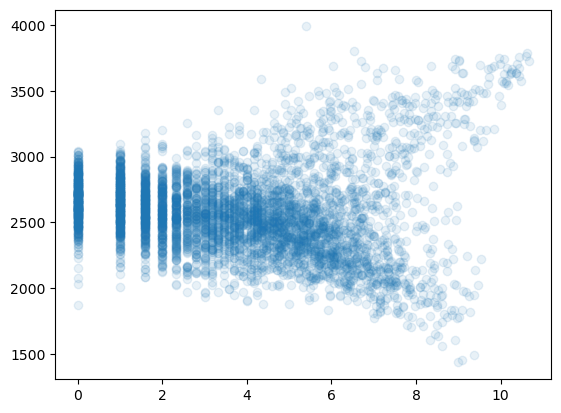

In [39]:
fig, ax = plt.subplots()
ax.scatter(np.log2(anti_cor_table[keep]["num_sig_neg"]), anti_cor_table[keep]["num_neg"], alpha=0.1)

In [40]:
selected_table = anti_cor_table[anti_cor_table["selected"]==True]
acg.var = pd.concat([acg.var,anti_cor_table], axis=1)

## And then we subset the data to only include the selected features!
acg.raw = acg
acg = acg[:, selected_table.index]

In [42]:
acg

View of AnnData object with n_obs × n_vars = 2700 × 1178
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'
    var: 'gene_ids', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'gene', 'pre_remove_feature', 'pre_remove_pathway', 'pre_remove_low_express', 'n_expressed', 'percent_expressed', 'non_zero_mean', 'num_neg', 'num_sig_neg', 'FP_hat', 'FDR', 'num_sig_pos_cor', 'selected'
    uns: 'log1p'

In [51]:
sc.pp.pca(acg, n_comps=200)

/opt/homebrew/Caskroom/miniforge/base/envs/ascc24/lib/python3.9/site-packages/scanpy/preprocessing/_pca.py:229: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm['X_pca'] = X_pca


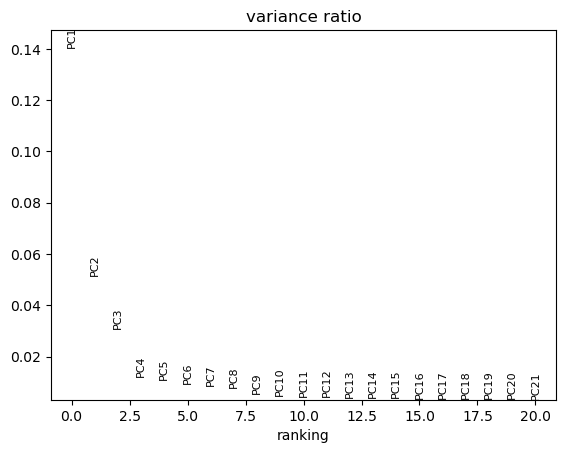

In [54]:
sc.pl.pca_variance_ratio(acg, n_pcs=20)

In [55]:
sc.pp.neighbors(acg, n_pcs=10, metric="cosine")
sc.tl.umap(acg)

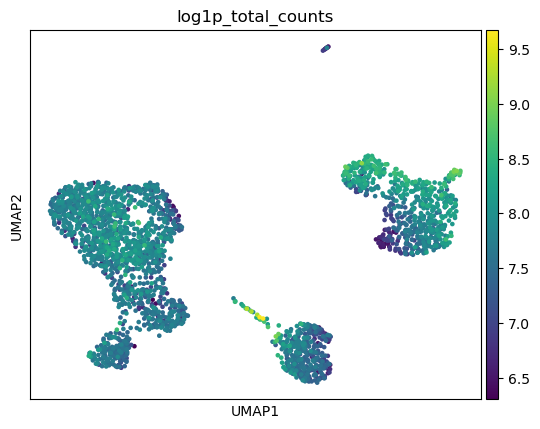

In [56]:
sc.pl.umap(acg, color="log1p_total_counts")

# check overlap and only use overlap

In [48]:
genes_both = np.intersect1d(hvg.var.index, acg.var.index)

In [67]:
genes_both_big = np.intersect1d(hvg.var.index, anti_cor_table[keep].index)
genes_both_big.shape

(1446,)

In [68]:
genes_both.shape

(378,)

In [57]:
both = adata[:, genes_both].copy()

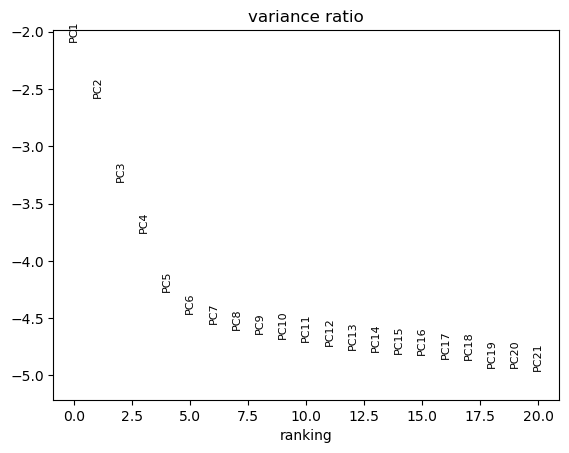

In [64]:
sc.pp.pca(both, n_comps=200)
sc.pl.pca_variance_ratio(both, n_pcs=20, log=True)

In [65]:
sc.pp.neighbors(both, n_pcs=8)
sc.tl.umap(both)

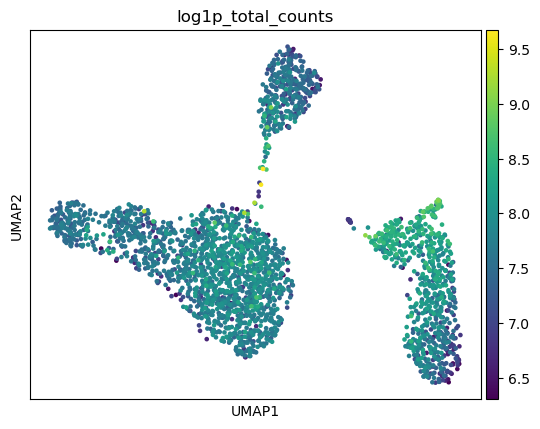

In [66]:
sc.pl.umap(both, color="log1p_total_counts")